# Introduction

In this code we will explore "Prosper Loan Data" data set which contains 113,937 loans with 81 variables on each 
loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

The Question will answer in this code which will help us to have clear insights about our data are:
>-- What factors affect a loan’s outcome status?


>-- What affects the borrower’s APR?


>-- Are there differences between loans depending on how large the original loan amount was?

Also we will introduce some exploratory plots and keys through the flow of the code.

Finally some conclusions will be summarized to have highlight the insights of the code.

In [1]:
#importing needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import pearsonr
%matplotlib inline

In [2]:
df = pd.read_csv('D:\\prosperLoanData.csv')            #reading data

In [3]:
df.head()                                           #exploring data frame

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
df.columns                           #exploring data

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

## Ordering loan status categeory according to the count number
### Univariant Exploration

In [5]:
y=df['LoanStatus'].value_counts()
type_order=y.index

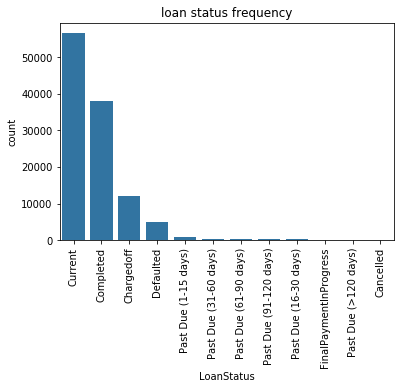

In [6]:
#First exploratary variable
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='LoanStatus', color=base_color, order=type_order).set(title='loan status frequency');
locs, labels = plt.xticks(rotation=90)

The plot here indicates that the types of status of the loan is divided into 12 categeories and most of the loans are in 
the "current" status and very few of them are cancelled

The plot indicates that linear scale is suitable.

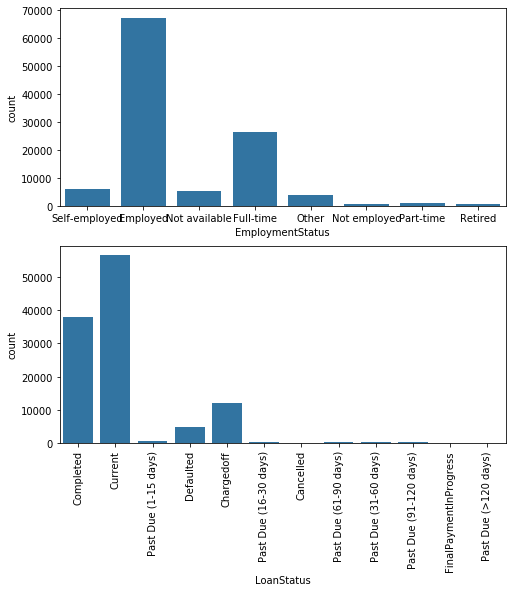

In [7]:
# Now lets explore the values of loans status with employment status 
fig, ax = plt.subplots(nrows=2, figsize = [8,8])
default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'EmploymentStatus', color = default_color, ax = ax[0]);
sb.countplot(data = df, x = 'LoanStatus', color = default_color, ax = ax[1]);
plt.xticks(rotation=90);

## Exploring relation between some numeric features

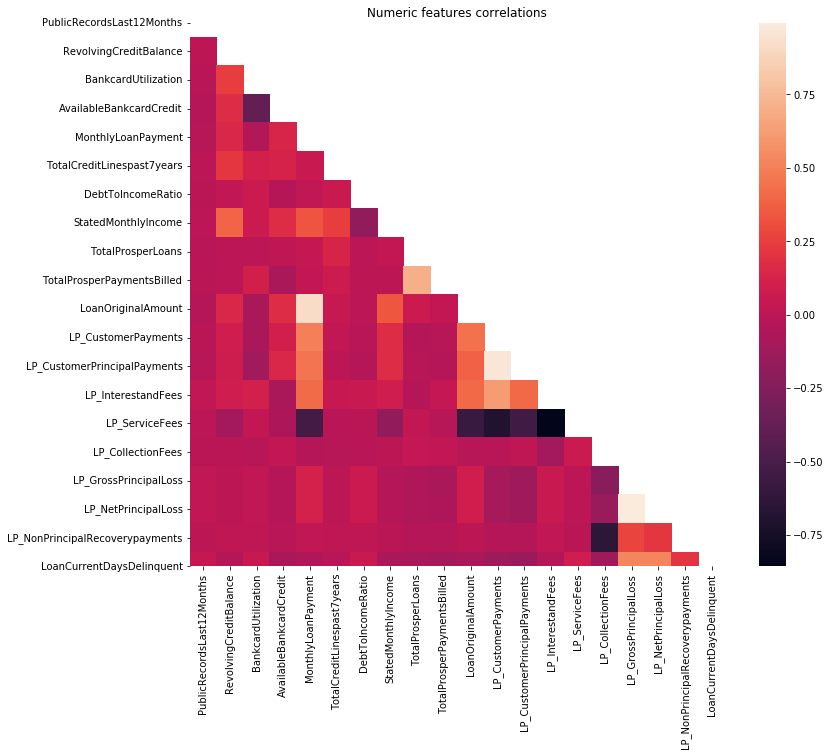

In [8]:
df1=df[['PublicRecordsLast12Months', 'RevolvingCreditBalance', 'BankcardUtilization', 'AvailableBankcardCredit',
        'MonthlyLoanPayment','TotalCreditLinespast7years', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 
        'TotalProsperLoans','TotalProsperPaymentsBilled','LoanOriginalAmount', 'LoanOriginationDate', 
        'LP_CustomerPayments', 'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 'LP_ServiceFees', 
        'LP_CollectionFees','LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss',
        'LP_NonPrincipalRecoverypayments','LoanCurrentDaysDelinquent']].dropna()

# Correlation between different variables
corr = df1.corr(method='pearson')
# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(12, 10))
# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Draw the heatmap
sb.heatmap(corr, mask = mask).set(title='Numeric features correlations');

### How the Employment status affect the loan status ?
### bivariant relation

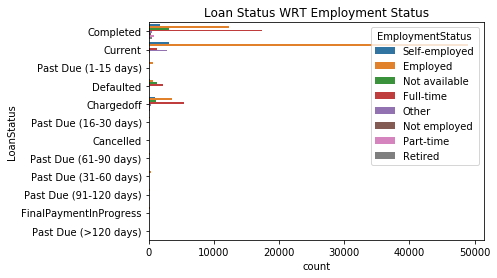

In [9]:
sb.countplot(data = df, y = 'LoanStatus', hue = 'EmploymentStatus').set(title='Loan Status WRT Employment Status');

As it appears to be very crowded, so another prespictive for this distribtion will be executed

C:\Users\Esraa\Anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 576x432 with 0 Axes>

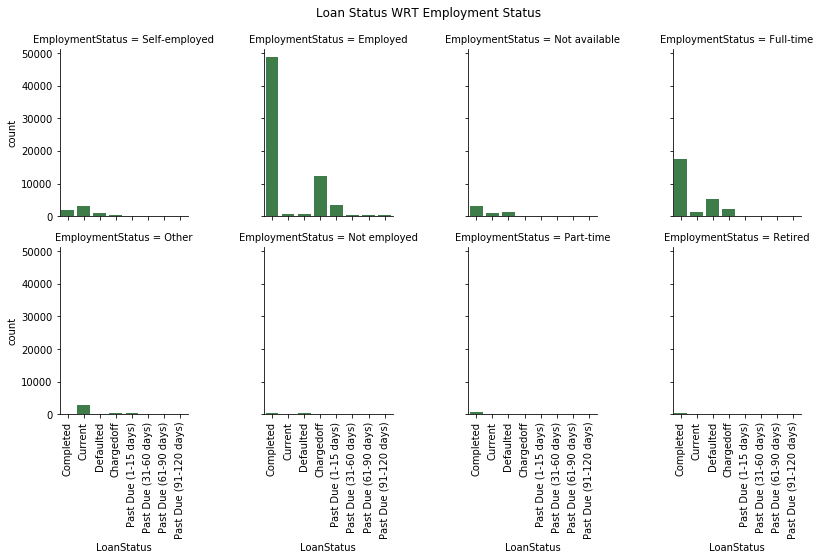

In [10]:
plt.figure(figsize=(8, 6));
g = sb.FacetGrid(data = df, col = 'EmploymentStatus',col_wrap=4);
g.map(sb.countplot, "LoanStatus", color="#338844");
g.fig.suptitle("Loan Status WRT Employment Status", y=1.04);
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

We found here that the most categeory that completed the loan are the full_time employed people followed by employed people , Which indicates that employemnt status may have impact on the loan status

## Indicating correlation co_efficient between features  and the loan status

In [11]:
corr_feature=df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
corr_loan_stat=corr_feature[corr_feature['LoanStatus']>=0.10]
corr_loan_stat

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
LoanStatus,0.002872,0.002872,0.002875,0.044551,-0.028122,1.000000,0.054439,-0.034921,-0.030130,-0.028463,...,-0.024114,0.264476,0.616272,0.614375,0.234248,0.014897,-0.006722,-0.020569,-0.017741,-0.010431
InquiriesLast6Months,0.005645,0.005645,0.005609,0.213791,-0.097505,0.124671,0.181419,0.089254,0.048957,0.051609,...,0.005749,0.077399,0.187940,0.187732,0.075453,-0.010967,0.046237,0.021765,0.015456,0.025000
TotalInquiries,0.005173,0.005173,0.005169,0.237629,-0.099358,0.115713,0.180546,0.106497,0.057616,0.061248,...,0.006782,0.074113,0.181717,0.181146,0.078379,-0.016181,0.061380,0.029205,0.017539,0.033148
CurrentDelinquencies,0.001872,0.001872,0.001818,0.137641,-0.068168,0.112822,0.131955,0.059214,0.005094,0.011641,...,-0.019451,0.059732,0.143223,0.143728,0.049931,-0.005965,0.025590,0.013038,0.011428,-0.040275
LoanCurrentDaysDelinquent,0.042326,0.042326,0.042336,0.238336,-0.122222,0.677096,0.339027,0.106230,0.071627,0.071236,...,0.032111,0.261193,0.686045,0.685764,0.285709,0.005986,0.052457,0.019569,0.016225,0.081146
LoanFirstDefaultedCycleNumber,0.004903,0.004903,0.004912,0.261446,-0.130001,0.614666,0.327545,0.106786,0.069001,0.070117,...,0.034441,0.250286,0.687568,0.681713,0.266195,0.004760,0.052655,0.018170,0.009666,0.077884
LP_CustomerPrincipalPayments,0.405291,0.405291,0.405308,-0.047878,0.040057,0.401032,-0.113229,-0.044925,-0.015992,-0.013749,...,0.271710,0.225736,0.437461,0.433218,0.165563,0.097853,-0.011592,-0.013362,0.000688,0.021848
LP_CollectionFees,0.116501,0.116501,0.116506,0.110649,-0.057160,0.264476,0.115762,0.062843,0.042376,0.041055,...,0.094796,1.000000,0.325105,0.314602,0.458644,0.010705,0.018538,0.007562,0.008255,0.041192
LP_GrossPrincipalLoss,0.199165,0.199165,0.199173,0.246422,-0.119923,0.616272,0.346536,0.134346,0.083431,0.084244,...,0.064420,0.325105,1.000000,0.988641,0.380901,0.015809,0.051397,0.018446,0.019832,0.082737
LP_NetPrincipalLoss,0.198086,0.198086,0.198093,0.243491,-0.119265,0.614375,0.345003,0.132243,0.081837,0.082585,...,0.062695,0.314602,0.988641,1.000000,0.355251,0.015152,0.050417,0.016585,0.019977,0.081809


#### What factors affect a loan’s outcome status?

In [12]:
corr_loan_stat['LoanStatus']

LoanStatus                         1.000000
InquiriesLast6Months               0.124671
TotalInquiries                     0.115713
CurrentDelinquencies               0.112822
LoanCurrentDaysDelinquent          0.677096
LoanFirstDefaultedCycleNumber      0.614666
LP_CustomerPrincipalPayments       0.401032
LP_CollectionFees                  0.264476
LP_GrossPrincipalLoss              0.616272
LP_NetPrincipalLoss                0.614375
LP_NonPrincipalRecoverypayments    0.234248
Name: LoanStatus, dtype: float64

These are the feaure that affects the loan status and apparently the "LoanCurrentDaysDelinquent" feature is the strongest correlation co-efficient with loan status in the data frame

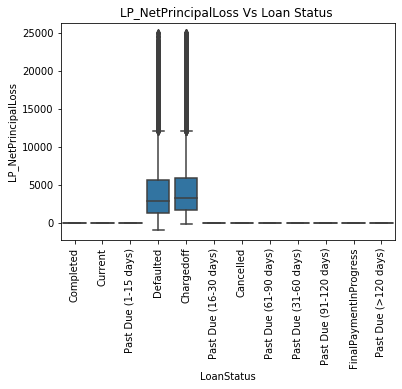

In [13]:
sb.boxplot(data=df, y='LP_NetPrincipalLoss', x='LoanStatus', color=sb.color_palette()[0]).set(title='LP_NetPrincipalLoss Vs Loan Status ');
plt.xticks(rotation=90);

The Defaulted and the chargedoff categeories are the only 2 status that vary with LP_NetPrincipalLoss

<Figure size 576x432 with 0 Axes>

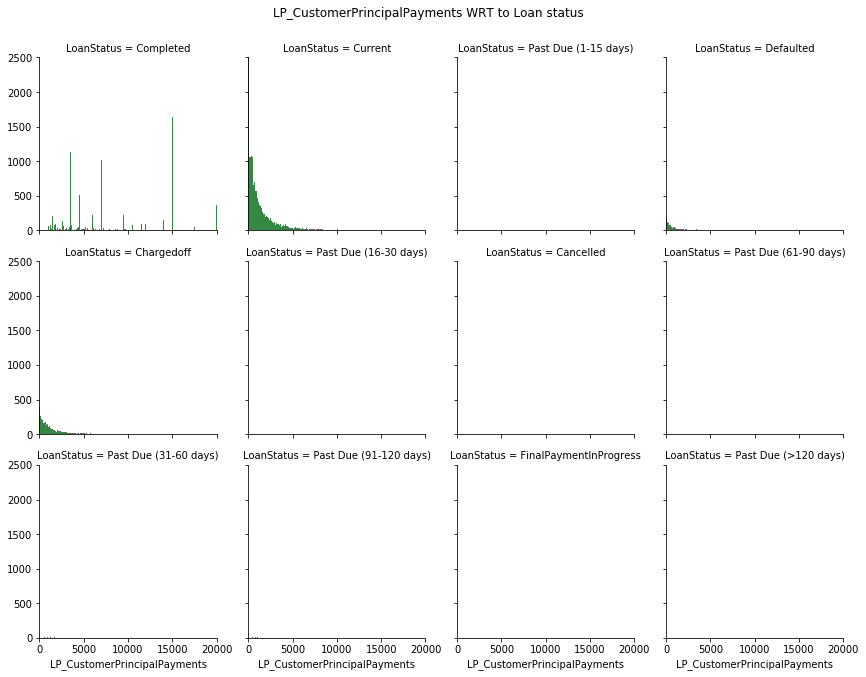

In [14]:
bin_edges = np.arange(0, df['LP_CustomerPrincipalPayments'].max()+30, 30)
plt.figure(figsize=(8, 6));
g = sb.FacetGrid(data = df, col = 'LoanStatus',col_wrap=4);
g.map(plt.hist, "LP_CustomerPrincipalPayments",bins = bin_edges, color="#338844");
g.fig.suptitle("LP_CustomerPrincipalPayments WRT to Loan status", y=1.04);
plt.xlim([0,20000]);
plt.ylim([0,2500]);

#### What affects the borrower’s APR ?

In [15]:
corr_APR_neg=corr_feature[corr_feature['BorrowerAPR']<=-0.10]
corr_APR_pos=corr_feature[corr_feature['BorrowerAPR']>=0.10]
corr_APR=pd.concat([corr_APR_neg,corr_APR_pos])
corr_APR['BorrowerAPR']

EstimatedLoss                   -0.145701
ProsperRating (numeric)         -0.269389
ProsperRating (Alpha)           -0.269389
ProsperScore                    -0.274315
CurrentlyInGroup                -0.192651
PublicRecordsLast12Months       -0.110612
CreditGrade                      0.335248
ClosedDate                       0.288528
BorrowerAPR                      1.000000
BorrowerRate                     0.659202
LenderYield                      0.632452
EstimatedEffectiveYield          0.175127
EstimatedReturn                  0.144543
EmploymentStatus                 0.236216
GroupKey                         0.126615
CreditScoreRangeLower            0.103306
CreditScoreRangeUpper            0.103306
TotalInquiries                   0.106497
LoanCurrentDaysDelinquent        0.106230
LoanFirstDefaultedCycleNumber    0.106786
LoanMonthsSinceOrigination       0.243307
LoanOriginationDate              0.183008
LoanOriginationQuarter           0.242839
MonthlyLoanPayment               0

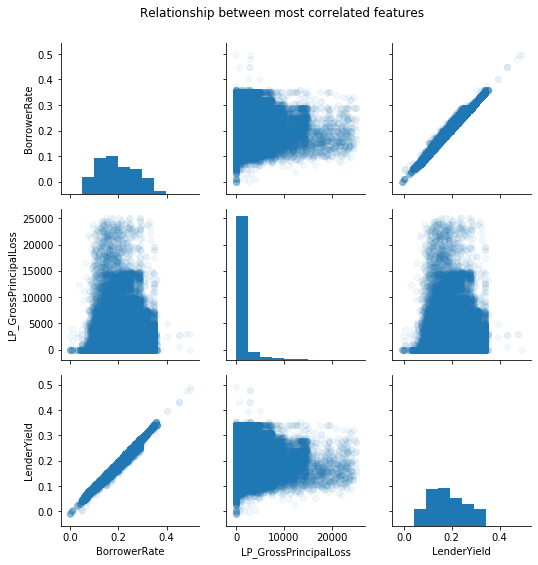

In [16]:
g = sb.PairGrid(data = df, vars = ['BorrowerRate', 'LP_GrossPrincipalLoss', 'LenderYield']);
g.map_diag(plt.hist);
g.map_offdiag(plt.scatter,alpha=1/20);
g.fig.suptitle("Relationship between most correlated features", y=1.04);

There is direct relation between the BorrowerRate and the LenderYield.

### multivariant relation

C:\Users\Esraa\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


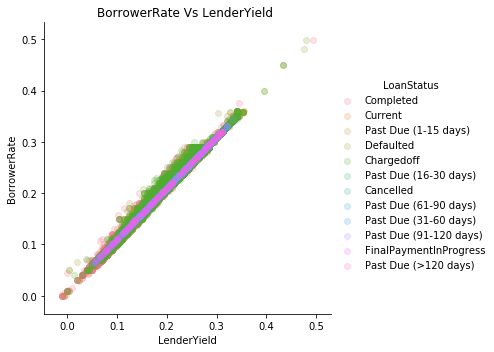

In [17]:
g = sb.FacetGrid(data = df, hue = 'LoanStatus', size = 5).set(title='BorrowerRate Vs LenderYield ')
g.map(plt.scatter, 'LenderYield', 'BorrowerRate',alpha=0.2);
g.add_legend();

#### Are there differences between loans depending on how large the original loan amount was?

Text(0.5, 1.0, 'LoanOriginalAmount Frequency')

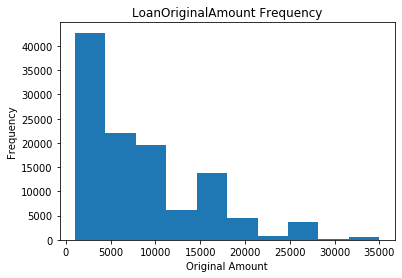

In [18]:
# exploratory plot
plt.hist(data=df,x='LoanOriginalAmount');
plt.xlabel('Original Amount');
plt.ylabel('Frequency');
plt.title('LoanOriginalAmount Frequency')

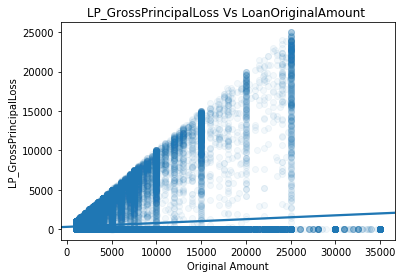

In [19]:
sb.regplot(data = df, x = 'LoanOriginalAmount', y = 'LP_GrossPrincipalLoss',truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/20}).set(title='LP_GrossPrincipalLoss Vs LoanOriginalAmount ');
plt.xlabel('Original Amount');
plt.ylabel('LP_GrossPrincipalLoss');

It is clear that as the amount of original loan increase , the LP_GrossPrincipalLoss increase except with some outlier values that exceeds 25000 value.

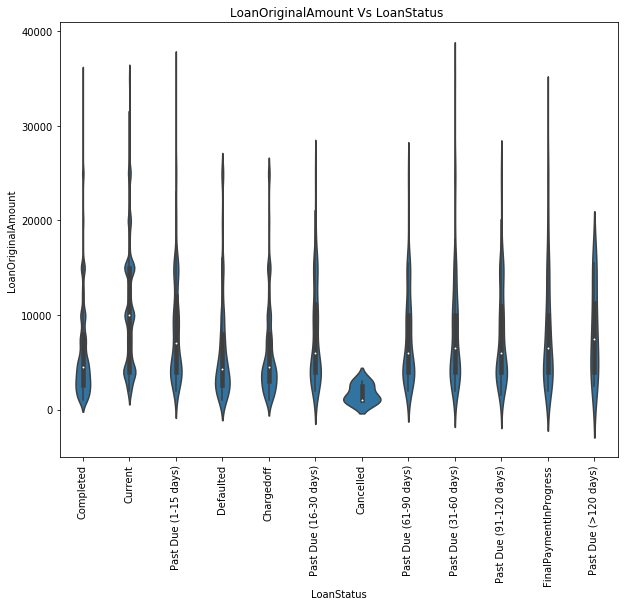

In [20]:
plt.figure(figsize = [10, 8]);
L_O_A = sb.violinplot(data=df, y='LoanOriginalAmount', x='LoanStatus', innner='quartile',color=sb.color_palette()[0]).set(title='LoanOriginalAmount Vs LoanStatus ');
plt.xticks(rotation=90);

C:\Users\Esraa\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


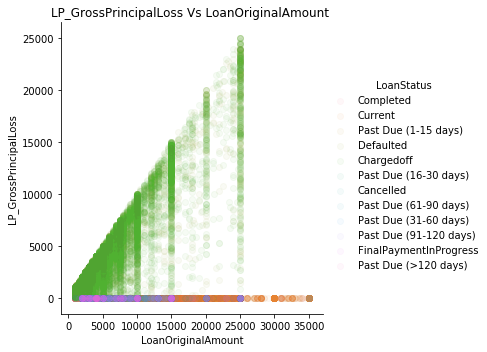

In [22]:
g = sb.FacetGrid(data = df, hue = 'LoanStatus', size = 5).set(title='LP_GrossPrincipalLoss Vs LoanOriginalAmount ')
g.map(plt.scatter, 'LoanOriginalAmount','LP_GrossPrincipalLoss', alpha=1/20);
g.add_legend();

It is clear there are differences between loans according to thier original amount.

# Conclusion

The keys we need to highlight here are:
>-- The employement status plays an important role in loan status with correlation =0.23.

>-- There are 10 factors have high impact on loan status as cleared above.

>-- The most correlated factor with loan status is LoanCurrentDaysDelinquent.

>-- There are some positive and negative correlation co-efficients which affects APR of the borrower as stated above.

>-- The original amount of the loan make differences in the features of the loan.